In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from ndac.data_processing import quantile_classify, encode_sequence, value_classify
from ndac.predict import train_clstm

/Users/joshsmith/Git/NovoNordisk_Capstone/.env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# read in sequence/property data
data = pd.read_csv('dataframes/DF_prest.csv', index_col=0)

# train with nucleotide seq

45206 samples input.
11302 samples in class 0
11301 samples in class 1
22603 samples removed.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 10)           740       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 200, 128)          3968      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 100, 128)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 96,409
Trainable params: 96,409
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1
15677/15677 [================

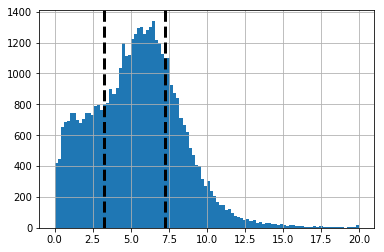

In [41]:
# split quantiles and encode with nucleotide sequence
df, hist = quantile_classify(data['conc_cf'], data['nt_seq'],
                             [0.25, 0.75], drop_class=[1])
X, y = encode_sequence(df['nt_seq'], df['class'],
                       max_length=200, tag='GACAAGCTTGCGGCCGCA')

nt_model = train_clstm(X, y, test_fraction=0.3, 
                       epochs=1)

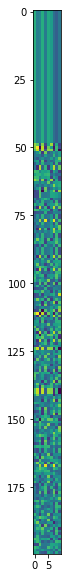

In [46]:
# Visualize embedded sequence after training nt_model
get_1st_layer_output = K.function([nt_model.layers[0].input, K.learning_phase()],
                                  [nt_model.layers[0].output])

x = X[0].reshape(-1,200)  # after using keras Tokenizer on X
# output in train mode = 1
layer_output = get_1st_layer_output([x, 1])[0]

plt.figure(figsize=(1, 10))
plt.imshow(layer_output[0])

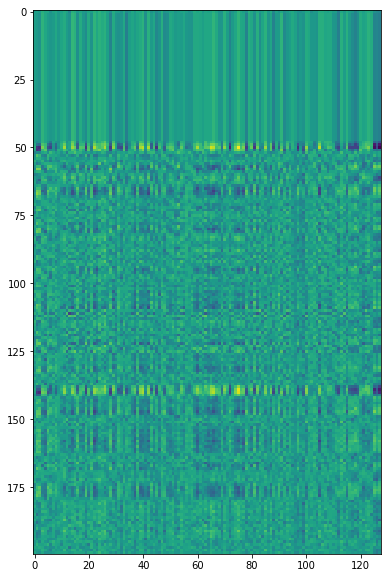

In [47]:
# Visualize embedded sequence after training nt_model
get_cnn_output = K.function([nt_model.layers[0].input, K.learning_phase()],
                            [nt_model.layers[1].output])
layer_output = get_cnn_output([x, 1])[0]
plt.figure(figsize=(10, 10))
plt.imshow(layer_output[0])

(1, 100, 128)

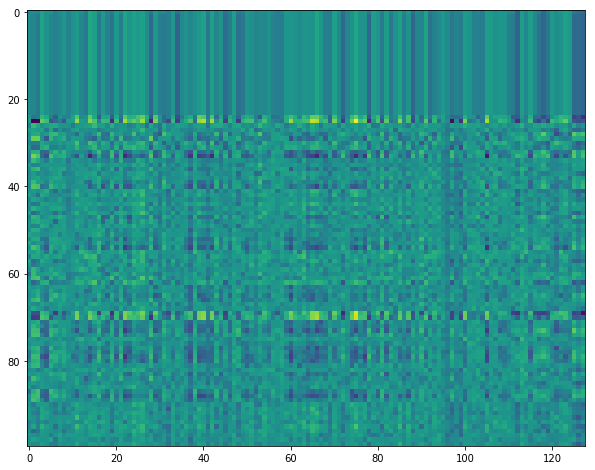

In [48]:
# Visualize embedded sequence after training nt_model
get_pool_output = K.function([nt_model.layers[0].input, K.learning_phase()],
                            [nt_model.layers[2].output])
layer_output = get_pool_output([x, 1])[0]
plt.figure(figsize=(10, 10))
plt.imshow(layer_output[0])
layer_output.shape

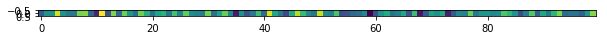

In [49]:
# Visualize embedded sequence after training nt_model
get_lstm_output = K.function([nt_model.layers[0].input, K.learning_phase()],
                             [nt_model.layers[3].output])
layer_output = get_lstm_output([x, 1])[0]
layer_output.shape
plt.figure(figsize=(10, 10))
plt.imshow(layer_output)

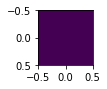

In [50]:
# Visualize embedded sequence after training nt_model
get_output = K.function([nt_model.layers[0].input, K.learning_phase()],
                             [nt_model.layers[4].output])
layer_output = get_output([x, 1])[0]
layer_output.shape
plt.figure(figsize=(1, 1))
plt.imshow(layer_output)

# train with amino acid sequence

45206 samples input.
11302 samples in class 0
11301 samples in class 1
22603 samples removed.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 4)            84        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 200, 128)          1664      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 100, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 93,449
Trainable params: 93,449
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1
15822/15822 [================

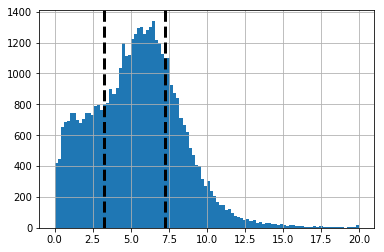

In [5]:
df, hist = quantile_classify(data['conc_cf'], data['aa_seq'],
                             [0.25, 0.75], drop_class=[1])
X, y = encode_sequence(df['aa_seq'], df['class'],
                       max_length=200)

aa_model = train_clstm(X, y, test_fraction=0.3, epochs=1)

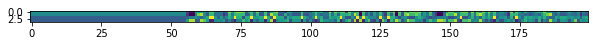

In [7]:
# Visualize embedded sequence after training aa_model
get_1st_layer_output = K.function([aa_model.layers[0].input, K.learning_phase()],
                                  [aa_model.layers[0].output])

x = X[0].reshape(-1,200)  # after using keras Tokenizer on X
# output in train mode = 1
layer_output = get_1st_layer_output([x, 1])[0]

plt.figure(figsize=(10, 1))
plt.imshow(layer_output[0].T)

# solubility multiclass

In [18]:
# read in sequence/property data
data = pd.read_csv('dataframes/DF_solubility.csv', index_col=0)

16082 samples input.
3324 samples in class 0
7667 samples in class 1
5091 samples removed.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 4)            84        
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 200, 128)          1664      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 100, 128)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 93,449
Trainable params: 93,449
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1
7693/7693 [=====================

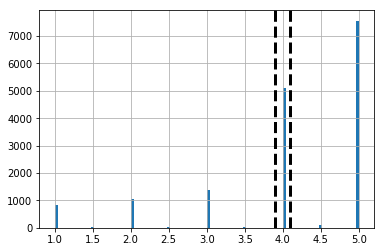

In [20]:
df, hist = value_classify(data['solubility_class_1M'], data['aa_seq'],
                             [3.9, 4.1], drop_class=[1])
X, y = encode_sequence(df['aa_seq'], df['class'],
                       max_length=200)
aa_model = train_clstm(X, y, test_fraction=0.3, epochs=1)

16082 samples input.
838 samples in class 0
1071 samples in class 1
1394 samples in class 2
5112 samples in class 3
7667 samples in class 4
0 samples removed.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 200, 4)            84        
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 200, 128)          1664      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 100, 128)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 505       
Total params: 93,853
Trainable params: 93,853
Non-trainable params: 0
_____________________________________________

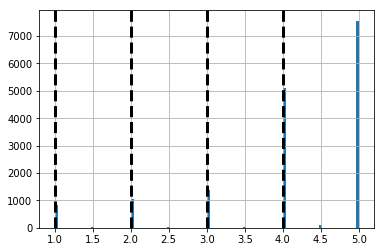

In [22]:
df, hist = value_classify(data['solubility_class_1M'], data['aa_seq'],
                             [1, 2, 3, 4])
X, y = encode_sequence(df['aa_seq'], df['class'],
                       max_length=200)
aa_model = train_clstm(X, y, test_fraction=0.3, epochs=1)